In [ ]:
MILESTONE - 1

In [1]:
import pandas as pd
import numpy as np

In [8]:
df = pd.read_csv('/content/Flight_delay.csv')
# Preview dataset
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (484551, 29)


,DayOfWeek,Date,DepTime,ArrTime,CRSArrTime,UniqueCarrier,Airline,FlightNum,TailNum,ActualElapsedTime,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,4,03-01-2019,1829,1959,1925,WN,Southwest Airlines Co.,3920,N464WN,90,...,3,10,0,N,0,2,0,0,0,32
1,4,03-01-2019,1937,2037,1940,WN,Southwest Airlines Co.,509,N763SW,240,...,3,7,0,N,0,10,0,0,0,47
2,4,03-01-2019,1644,1845,1725,WN,Southwest Airlines Co.,1333,N334SW,121,...,6,8,0,N,0,8,0,0,0,72
3,4,03-01-2019,1452,1640,1625,WN,Southwest Airlines Co.,675,N286WN,228,...,7,8,0,N,0,3,0,0,0,12
4,4,03-01-2019,1323,1526,1510,WN,Southwest Airlines Co.,4,N674AA,123,...,4,9,0,N,0,0,0,0,0,16


In [9]:
cols_to_drop = ["TailNum", "FlightNum", "CancellationCode"]
df = df.drop(columns=cols_to_drop)

print("After Dropping Columns:", df.shape)
df.head()

After Dropping Columns: (484551, 26)


,DayOfWeek,Date,DepTime,ArrTime,CRSArrTime,UniqueCarrier,Airline,ActualElapsedTime,CRSElapsedTime,AirTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,4,03-01-2019,1829,1959,1925,WN,Southwest Airlines Co.,90,90,77,...,515,3,10,0,0,2,0,0,0,32
1,4,03-01-2019,1937,2037,1940,WN,Southwest Airlines Co.,240,250,230,...,1591,3,7,0,0,10,0,0,0,47
2,4,03-01-2019,1644,1845,1725,WN,Southwest Airlines Co.,121,135,107,...,828,6,8,0,0,8,0,0,0,72
3,4,03-01-2019,1452,1640,1625,WN,Southwest Airlines Co.,228,240,213,...,1489,7,8,0,0,3,0,0,0,12
4,4,03-01-2019,1323,1526,1510,WN,Southwest Airlines Co.,123,135,110,...,838,4,9,0,0,0,0,0,0,16


In [10]:
# Fill missing values in airport names
df["Org_Airport"] = df["Org_Airport"].fillna("Unknown")
df["Dest_Airport"] = df["Dest_Airport"].fillna("Unknown")

# Check missing values
df.isnull().sum().head(10)

,0
DayOfWeek,0
Date,0
DepTime,0
ArrTime,0
CRSArrTime,0
UniqueCarrier,0
Airline,0
ActualElapsedTime,0
CRSElapsedTime,0
AirTime,0


In [11]:
df["Date"] = pd.to_datetime(df["Date"], errors="coerce", format="%d-%m-%Y")

print("Date Conversion Done ✅")
df[["Date"]].head()

Date Conversion Done ✅


,Date
0,2019-01-03
1,2019-01-03
2,2019-01-03
3,2019-01-03
4,2019-01-03


In [12]:
def convert_to_time(val):
    try:
        val = int(val)
        return f"{val//100:02d}:{val%100:02d}"
    except:
        return None

time_cols = ["DepTime", "ArrTime", "CRSArrTime"]
for col in time_cols:
    df[col] = df[col].apply(convert_to_time)

df[time_cols].head()


,DepTime,ArrTime,CRSArrTime
0,18:29,19:59,19:25
1,19:37,20:37,19:40
2,16:44,18:45,17:25
3,14:52,16:40,16:25
4,13:23,15:26,15:10


In [13]:
delay_cols = ["CarrierDelay", "WeatherDelay", "NASDelay", "SecurityDelay", "LateAircraftDelay"]

df["TotalDelayReason"] = df[delay_cols].sum(axis=1)

def primary_reason(row):
    delays = {col: row[col] for col in delay_cols}
    max_delay = max(delays.values())
    if max_delay == 0:
        return "No Delay"
    return max(delays, key=delays.get)

df["PrimaryDelayReason"] = df.apply(primary_reason, axis=1)

df[["TotalDelayReason", "PrimaryDelayReason"]].head(10)


,TotalDelayReason,PrimaryDelayReason
0,34,LateAircraftDelay
1,57,LateAircraftDelay
2,80,LateAircraftDelay
3,15,LateAircraftDelay
4,16,LateAircraftDelay
5,37,LateAircraftDelay
6,19,LateAircraftDelay
7,47,CarrierDelay
8,64,LateAircraftDelay
9,72,LateAircraftDelay


In [14]:
final_columns = [
    "Date", "DayOfWeek", "Airline", "UniqueCarrier",
    "Origin", "Org_Airport", "Dest", "Dest_Airport",
    "DepTime", "ArrTime", "CRSArrTime",
    "DepDelay", "ArrDelay", "Distance",
    "Cancelled", "Diverted",
    "TotalDelayReason", "PrimaryDelayReason"
]

df_final = df[final_columns]

print("Final Dataset Shape:", df_final.shape)
df_final.head()


Final Dataset Shape: (484551, 18)


,Date,DayOfWeek,Airline,UniqueCarrier,Origin,Org_Airport,Dest,Dest_Airport,DepTime,ArrTime,CRSArrTime,DepDelay,ArrDelay,Distance,Cancelled,Diverted,TotalDelayReason,PrimaryDelayReason
0,2019-01-03,4,Southwest Airlines Co.,WN,IND,Indianapolis International Airport,BWI,Baltimore-Washington International Airport,18:29,19:59,19:25,34,34,515,0,0,34,LateAircraftDelay
1,2019-01-03,4,Southwest Airlines Co.,WN,IND,Indianapolis International Airport,LAS,McCarran International Airport,19:37,20:37,19:40,67,57,1591,0,0,57,LateAircraftDelay
2,2019-01-03,4,Southwest Airlines Co.,WN,IND,Indianapolis International Airport,MCO,Orlando International Airport,16:44,18:45,17:25,94,80,828,0,0,80,LateAircraftDelay
3,2019-01-03,4,Southwest Airlines Co.,WN,IND,Indianapolis International Airport,PHX,Phoenix Sky Harbor International Airport,14:52,16:40,16:25,27,15,1489,0,0,15,LateAircraftDelay
4,2019-01-03,4,Southwest Airlines Co.,WN,IND,Indianapolis International Airport,TPA,Tampa International Airport,13:23,15:26,15:10,28,16,838,0,0,16,LateAircraftDelay


In [15]:
df_final.to_csv("Cleaned_Flight_delay.csv", index=False)
print("✅ Cleaned Dataset Saved as Cleaned_Flight_delay.csv")


✅ Cleaned Dataset Saved as Cleaned_Flight_delay.csv


In [16]:
# Extract Year and Month from Date column
df_final["Year"] = df_final["Date"].dt.year
df_final["Month"] = df_final["Date"].dt.month_name()

# Unique Years and Months
unique_years = df_final["Year"].unique()
unique_months = df_final["Month"].unique()

print("✅ Years in dataset:", unique_years)
print("✅ Months in dataset:", unique_months)

# Count of records per Year
year_counts = df_final["Year"].value_counts().sort_index()
print("\n📊 Number of flights per Year:\n", year_counts)

# Count of records per Month (all years combined)
month_counts = df_final["Month"].value_counts()
print("\n📊 Number of flights per Month:\n", month_counts)

# Count of records per Year-Month (detailed breakdown)
year_month_counts = df_final.groupby(["Year", "Month"]).size()
print("\n📊 Number of flights per Year-Month:\n", year_month_counts)


/tmp/ipython-input-1485660349.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final["Year"] = df_final["Date"].dt.year
/tmp/ipython-input-1485660349.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final["Month"] = df_final["Date"].dt.month_name()


✅ Years in dataset: [2019]
✅ Months in dataset: ['January' 'February' 'March' 'April' 'May' 'June']

📊 Number of flights per Year:
 Year
2019    484551
Name: count, dtype: int64

📊 Number of flights per Month:
 Month
March       94196
January     87910
February    86969
June        79236
April       68169
May         68071
Name: count, dtype: int64

📊 Number of flights per Year-Month:
 Year  Month   
2019  April       68169
      February    86969
      January     87910
      June        79236
      March       94196
      May         68071
dtype: int64


In [17]:
# Extract Year and Month from Date
df_final["Year"] = df_final["Date"].dt.year
df_final["Month"] = df_final["Date"].dt.month

# Number of unique years
num_years = df_final["Year"].nunique()

# Number of unique months
num_months = df_final["Month"].nunique()

print("✅ Number of Years in dataset:", num_years)
print("✅ Number of Months in dataset:", num_months)

# Also list them for clarity
print("\nYears Present:", sorted(df_final["Year"].unique()))
print("Months Present:", sorted(df_final["Month"].unique()))


✅ Number of Years in dataset: 1
✅ Number of Months in dataset: 6

Years Present: [np.int32(2019)]
Months Present: [np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5), np.int32(6)]


/tmp/ipython-input-2220019022.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final["Year"] = df_final["Date"].dt.year
/tmp/ipython-input-2220019022.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final["Month"] = df_final["Date"].dt.month


In [ ]:
MILESTONE - 2

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure plots look nice
plt.style.use("seaborn-v0_8")
sns.set_palette("deep")

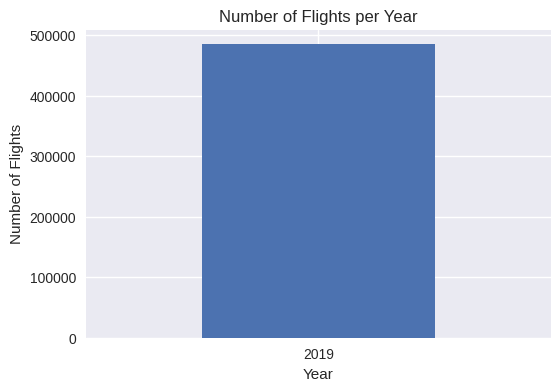

In [19]:
# ===========================
# 1. Flights per Year
# ===========================
plt.figure(figsize=(6,4))
df_final["Year"].value_counts().sort_index().plot(kind="bar")
plt.title("Number of Flights per Year")
plt.xlabel("Year")
plt.ylabel("Number of Flights")
plt.xticks(rotation=0)
plt.show()

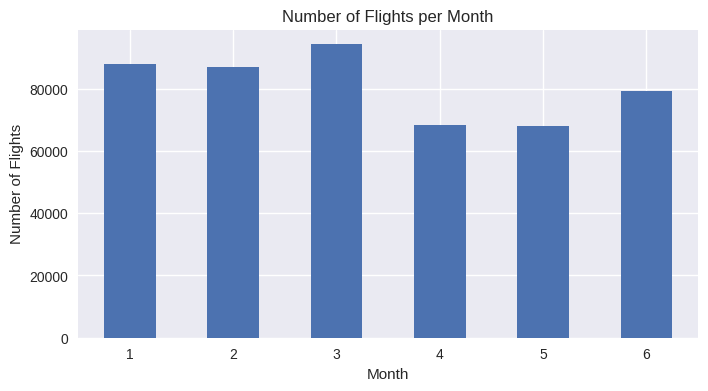

In [20]:
# ===========================
# 2. Flights per Month
# ===========================
plt.figure(figsize=(8,4))
df_final["Month"].value_counts().sort_index().plot(kind="bar")
plt.title("Number of Flights per Month")
plt.xlabel("Month")
plt.ylabel("Number of Flights")
plt.xticks(rotation=0)
plt.show()

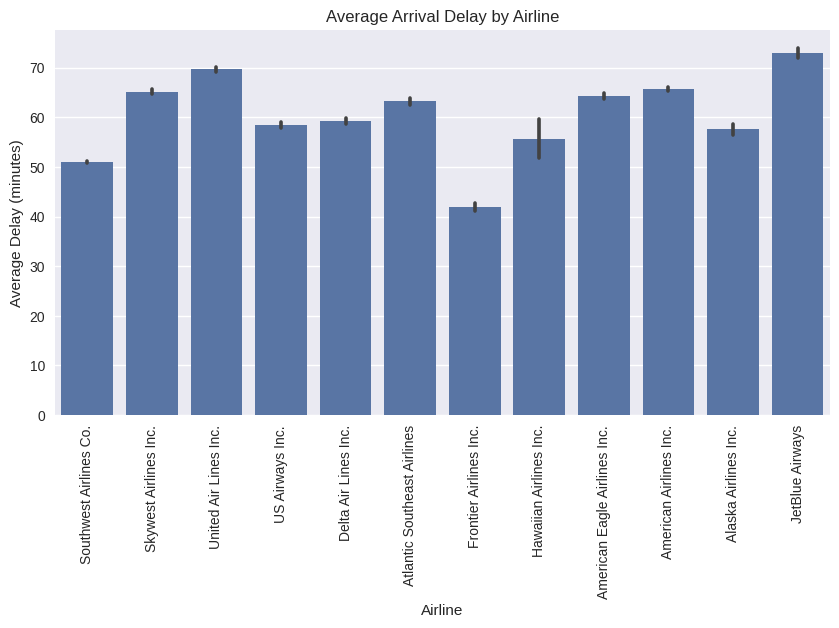

In [21]:

# ===========================
# 3. Average Delay by Airline
# ===========================
plt.figure(figsize=(10,5))
sns.barplot(x="Airline", y="ArrDelay", data=df_final, estimator=lambda x: sum(x)/len(x))
plt.title("Average Arrival Delay by Airline")
plt.xticks(rotation=90)
plt.ylabel("Average Delay (minutes)")
plt.show()

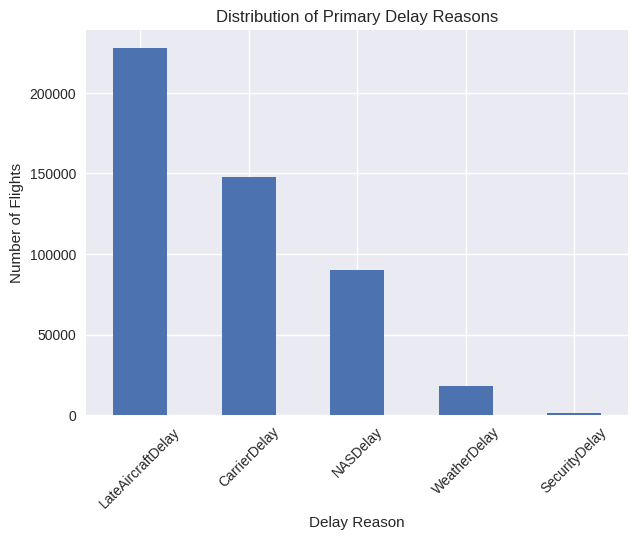

In [22]:

# ===========================
# 4. Primary Delay Reason Distribution
# ===========================
plt.figure(figsize=(7,5))
df_final["PrimaryDelayReason"].value_counts().plot(kind="bar")
plt.title("Distribution of Primary Delay Reasons")
plt.xlabel("Delay Reason")
plt.ylabel("Number of Flights")
plt.xticks(rotation=45)
plt.show()

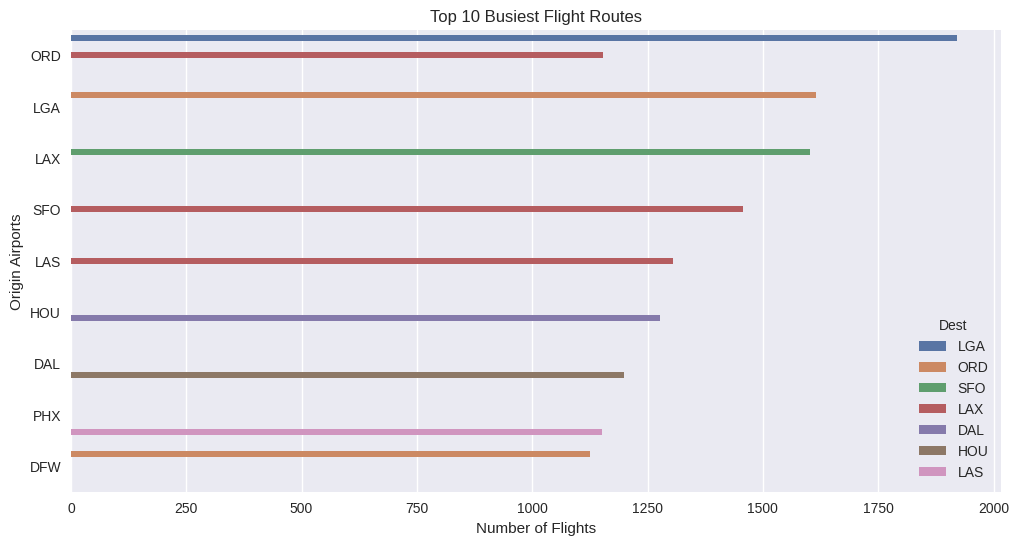

In [23]:

# ===========================
# 5. Flights by Origin vs Destination
# ===========================
plt.figure(figsize=(12,6))
top_routes = df_final.groupby(["Origin","Dest"]).size().reset_index(name="Counts").sort_values(by="Counts", ascending=False).head(10)
sns.barplot(x="Counts", y="Origin", hue="Dest", data=top_routes)
plt.title("Top 10 Busiest Flight Routes")
plt.xlabel("Number of Flights")
plt.ylabel("Origin Airports")
plt.show()